In [1]:
import large_image
from cStringIO import StringIO
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import skimage.segmentation
from skimage.segmentation import mark_boundaries

INFO:girder:Created LRU Cache for 'tilesource' with 104 maximum size
INFO:root:Notice: Could not import MapnikTileSource


In [2]:
ts = large_image.getTileSource("test2_superfixel.svs")
thumbData = ts.getThumbnail(width=1000, height=1000)[0]
file_jpgdata = StringIO(thumbData)
thumbImg = np.array(Image.open(file_jpgdata))
plt.imshow(thumbImg)
plt.show()

INFO:girder:Using python for large_image caching


Using python for large_image caching


TileSourceException: No available tilesource for test2_superfixel.svs

In [9]:
class BaseSegmentationHelper(object):
    @classmethod
    def loadImage(cls, imageDataStream):
        """
        Load an image into an RGB array.
        :param imageDataStream: A file-like object containing the encoded
        (JPEG, etc.) image data.
        :type imageDataStream: file-like object
        :return: A Numpy array with the RGB image data.
        :rtype: numpy.ndarray
        """
        raise NotImplementedError()

    @classmethod
    def writeImage(cls, image, encoding='png'):
        # TODO: cv2.imencode
        raise NotImplementedError()

    @classmethod
    def segment(cls, image, seedCoord, tolerance):
        raise NotImplementedError()

In [10]:
class ScikitSegmentationHelper():
    def __init__(self):
        self.message = "Hello World"
    
    @classmethod
    def superpixels(clc, image, compactness=0.01, maxIter=10, sigma=2.0):
        superpixelLabels = clc._slic(image, numSegments=1000, compactness=compactness,
                                    maxIter=maxIter, sigma=sigma)
#         superpixels = self._uint64ToRGB(superpixelLabels)
#         return superpixels
        return superpixelLabels
    
    @classmethod
    def _slic(clc, image, compactness, maxIter, sigma, numSegments=None, segmentSize=None):
        if numSegments and segmentSize:
            raise ValueError(
                'Only one of numSegments or segmentSize may be set.')
        elif numSegments:
            pass
        elif segmentSize: # currently not used so ignore
            numSegments = (image.shape[0] * image.shape[1]) / (segmentSize ** 2)
        else:
            raise ValueError('One of numSegments or segmentSize must be set.')

        labelImage = skimage.segmentation.slic(
            image,
            n_segments=numSegments,
            compactness=compactness,
            max_iter=maxIter,
            sigma=sigma,
            enforce_connectivity=True,
            min_size_factor=0.5,
            slic_zero=True
        )
        return labelImage

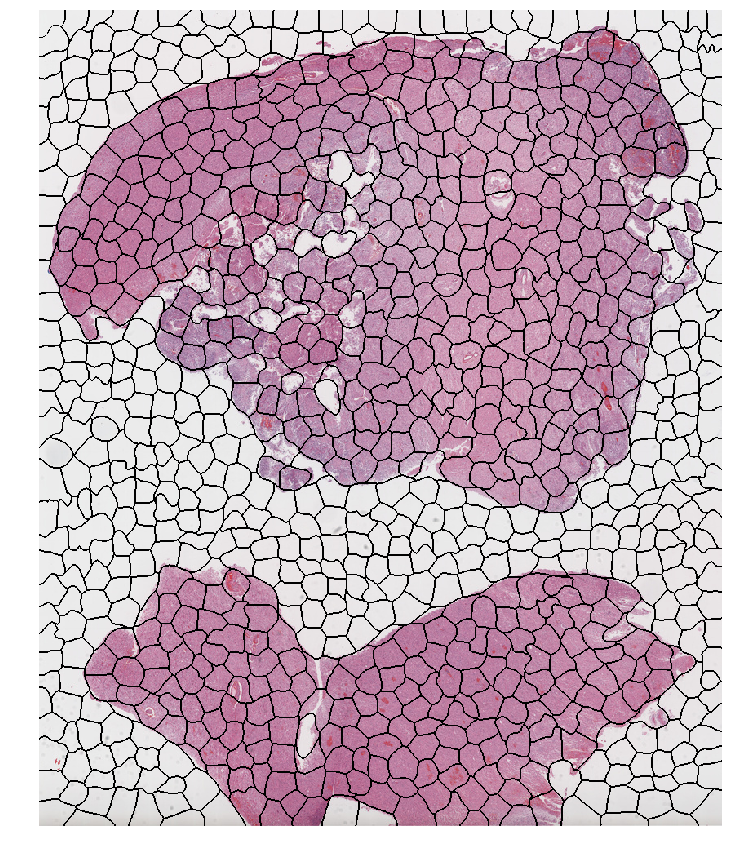

In [13]:
s = ScikitSegmentationHelper()
mask = s.superpixels(thumbImg, compactness=0.0001, maxIter=20, sigma=5.0)
# show the output of SLIC
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(thumbImg, mask, color=(0,0,0)))
plt.axis("off")
plt.show()